In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

<Figure size 640x480 with 0 Axes>

In [10]:
data=pd.read_csv(r"Data\Cancer_data\Reduction_from_Random_Forest.csv")
data=data.sample(frac=1,ignore_index=True)
labels=data['label']
data=data.iloc[:,1:-7]


# labels=data['label']
# data=data.drop(['class','BRCA','COAD','KIRC','LUAD','PRAD'],axis=1)

In [15]:
data.describe()

,gene_9927,gene_9928,gene_9929,gene_993,gene_9930,gene_9931,gene_9932,gene_9933,gene_9934,gene_9935,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.00000,801.000000
mean,0.133506,0.031187,0.114169,0.576883,0.167557,0.120448,0.076820,0.579498,0.130505,0.181222,...,0.270382,0.336316,0.339964,0.363043,0.309524,0.467481,0.030963,0.336231,0.06967,0.561714
std,0.230714,0.107527,0.167800,0.124997,0.239211,0.171600,0.115456,0.156195,0.167667,0.162166,...,0.183705,0.282232,0.195718,0.162130,0.201622,0.186034,0.083459,0.235598,0.16181,0.126643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.513464,0.000000,0.000000,0.000000,0.480012,0.000000,0.076392,...,0.143799,0.000000,0.190074,0.251501,0.164150,0.348711,0.000000,0.139218,0.00000,0.486705
50%,0.000000,0.000000,0.000000,0.592266,0.067240,0.000000,0.000000,0.575876,0.090140,0.146168,...,0.242476,0.342992,0.320255,0.349021,0.280934,0.455951,0.000000,0.362476,0.00000,0.568877
75%,0.132226,0.000000,0.210107,0.661067,0.208932,0.199060,0.123822,0.683375,0.226879,0.233749,...,0.343394,0.581841,0.473118,0.462262,0.422079,0.591579,0.000000,0.509629,0.00000,0.644886
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [105]:
# # Method 1 for dimension reduction
# from sklearn.ensemble import RandomForestRegressor
# model1=RandomForestRegressor(random_state=2,max_depth=10)
# model1.fit(data,labels)
# print("Dimension Reduction done")

Dimension Reduction done


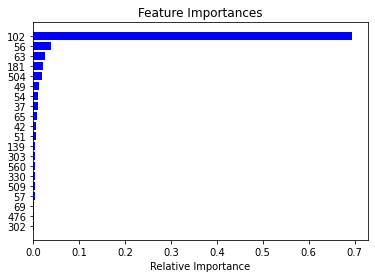

In [106]:
# features=data.columns
# importances=model1.feature_importances_
# indices = np.argsort(importances)[-20:]  # top 80 features
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()
# selected_features=[features[i] for i in indices]

In [16]:
selected_features=data.columns
data_after_RF=data[selected_features]

In [17]:
data_after_RF

,gene_9927,gene_9928,gene_9929,gene_993,gene_9930,gene_9931,gene_9932,gene_9933,gene_9934,gene_9935,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
0,0.000000,0.000000,0.249004,0.612961,0.034693,0.000000,0.000000,0.339472,0.000000,0.196995,...,0.232842,0.701605,0.201014,0.204521,0.413698,0.202251,0.000000,0.323391,0.0,0.464955
1,0.062113,0.000000,0.000000,0.406401,0.303412,0.000000,0.086531,0.643644,0.000000,0.158414,...,0.239429,0.140823,0.512629,0.146869,0.614346,0.794487,0.000000,0.445629,0.0,0.456855
2,0.000000,0.000000,0.000000,0.506583,0.091617,0.000000,0.000000,0.343722,0.000000,0.205697,...,0.243129,0.000000,0.273225,0.149860,0.383016,0.305764,0.000000,0.223135,0.0,0.160535
3,0.264123,0.051112,0.000000,0.747130,0.556956,0.106505,0.110599,0.809016,0.331405,0.464986,...,0.153188,0.035301,0.367076,0.147799,0.289340,0.573902,0.000000,0.000000,0.0,0.457369
4,0.069681,0.000000,0.000000,0.663729,0.099398,0.000000,0.097075,0.495370,0.336588,0.172666,...,0.319222,0.571493,0.351214,0.765403,0.532738,0.780900,0.000000,0.515430,0.0,0.744697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.202751,0.000000,0.000000,0.461057,0.062487,0.182371,0.000000,0.560209,0.000000,0.000000,...,0.351077,0.000000,0.100458,0.102211,0.678079,0.441522,0.120261,0.184402,0.0,0.575914
797,0.045279,0.094607,0.000000,0.657807,0.092543,0.435918,0.000000,0.617929,0.000000,0.144411,...,0.340370,0.711648,0.183219,0.444543,0.254238,0.428057,0.072264,0.149630,0.0,0.587541
798,0.104974,0.000000,0.344813,0.239239,0.000000,0.145200,0.083580,0.562303,0.222065,0.154295,...,0.291933,0.253096,0.622239,0.349021,0.535468,0.640127,0.000000,0.564047,0.0,0.689699
799,0.052949,0.000000,0.000000,0.455458,0.000000,0.000000,0.177216,0.561495,0.425556,0.198841,...,0.411080,0.737109,0.495502,0.363620,0.514074,0.830177,0.000000,0.366916,0.0,0.804147


In [18]:
labels

0      0
1      1
2      1
3      2
4      0
      ..
796    1
797    0
798    1
799    0
800    1
Name: label, Length: 801, dtype: int64

<h1 > Halt and Stop </h1>
<h2> PCA Code </h2>

In [65]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=20)
principalComponents = pca_1.fit_transform(X_train)
data_after_RF=pd.DataFrame(principalComponents)
data_after_RF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,17.629531,14.856823,10.593409,-3.781079,-0.230631,-2.629830,2.825996,-8.828905,-3.269102,-6.578480,2.159592,1.837202,-1.987490,1.322127,2.970779,-3.654699,2.091649,-3.082109,0.733009,-0.820087
1,8.315133,4.921955,-3.995595,-2.255632,-0.461161,0.916194,1.667741,-3.197429,1.044379,0.097800,0.168932,-0.695841,-1.567962,0.494077,-0.723823,-0.442762,1.914127,2.452142,2.941270,-0.875028
2,5.155627,2.154239,-5.819888,-1.102799,0.287754,1.054957,-0.567482,-2.257072,-1.038818,-1.656368,-0.147627,-0.803911,-0.978908,-1.965637,-0.601632,-1.967115,-2.640024,2.022526,2.801107,-0.959965
3,3.103288,3.767917,-6.018159,-1.677049,1.064371,0.691963,-1.510585,-1.111558,-1.349424,-2.358492,0.466362,-1.070167,0.433423,-2.167386,-0.530678,-2.469406,-3.085323,-0.314081,0.525884,-0.751699
4,1.893014,6.439557,-5.857893,-1.931942,0.319152,-0.173189,-0.837526,-1.445935,0.938064,-0.741610,-1.252487,0.630344,-1.756081,-1.811645,0.272141,-1.653960,-1.236539,-0.055979,0.671251,-2.306505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,-15.346321,-5.223540,2.066638,-0.071040,-2.737702,2.245572,-2.540565,-2.358935,-0.237690,-1.986813,1.721676,0.451884,0.742498,-0.463987,4.093653,4.451495,-1.226662,-5.124464,2.369892,2.796131
4248,-15.632898,-7.127824,2.817008,0.017201,-2.730833,2.092721,-3.115867,-3.415086,-1.001908,-2.261312,1.836727,0.698259,0.570752,-0.425441,4.355570,5.076866,-2.319139,-4.613177,3.123821,1.958682
4249,-17.016423,-9.349355,5.325734,1.912351,-1.780125,1.598338,-3.942679,-2.457444,-1.664441,1.860920,0.076592,1.036340,-5.423483,-1.701017,4.847681,2.904304,-1.793181,-3.872349,1.418040,0.675944
4250,-17.054935,-8.611769,3.950561,1.225732,0.202216,2.609193,-3.498617,-0.149453,-2.515303,-0.557511,1.498262,0.026294,-3.384069,-3.548249,3.816402,2.331627,-2.298082,-3.585890,-0.505159,1.327229


<h2> PCA STOP </h2>

In [19]:
# Defining Splitter for the dataset (Common for all)
def splitter(len_array,lower_bound, incrementor, start_idx):
    final=0
    per=[]
    sp=[start_idx]
    for i in range(lower_bound,100,incrementor):
        if final+i>100:
            break
        per.append(i)
        final+=i
    for i in per:
        len_of_data=round((i/100)*len_array)
        sp.append(sp[-1]+len_of_data)
    return per,sp

lower_bound=5
incrementor=5
start_idx=0

        
spliting_percentage, spliting_position=splitter(len(data),lower_bound,incrementor,start_idx)
print("Splitting Percentages are: {}".format(spliting_percentage))
print("Splitting Position are: {}".format(spliting_position))

Splitting Percentages are: [5, 10, 15, 20, 25]
Splitting Position are: [0, 40, 120, 240, 400, 600]


In [20]:
data_for_experiment=data_after_RF.copy(deep=True)
labels_for_experiment=labels.copy(deep=True)

In [21]:
data_after_RF

,gene_9927,gene_9928,gene_9929,gene_993,gene_9930,gene_9931,gene_9932,gene_9933,gene_9934,gene_9935,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
0,0.000000,0.000000,0.249004,0.612961,0.034693,0.000000,0.000000,0.339472,0.000000,0.196995,...,0.232842,0.701605,0.201014,0.204521,0.413698,0.202251,0.000000,0.323391,0.0,0.464955
1,0.062113,0.000000,0.000000,0.406401,0.303412,0.000000,0.086531,0.643644,0.000000,0.158414,...,0.239429,0.140823,0.512629,0.146869,0.614346,0.794487,0.000000,0.445629,0.0,0.456855
2,0.000000,0.000000,0.000000,0.506583,0.091617,0.000000,0.000000,0.343722,0.000000,0.205697,...,0.243129,0.000000,0.273225,0.149860,0.383016,0.305764,0.000000,0.223135,0.0,0.160535
3,0.264123,0.051112,0.000000,0.747130,0.556956,0.106505,0.110599,0.809016,0.331405,0.464986,...,0.153188,0.035301,0.367076,0.147799,0.289340,0.573902,0.000000,0.000000,0.0,0.457369
4,0.069681,0.000000,0.000000,0.663729,0.099398,0.000000,0.097075,0.495370,0.336588,0.172666,...,0.319222,0.571493,0.351214,0.765403,0.532738,0.780900,0.000000,0.515430,0.0,0.744697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.202751,0.000000,0.000000,0.461057,0.062487,0.182371,0.000000,0.560209,0.000000,0.000000,...,0.351077,0.000000,0.100458,0.102211,0.678079,0.441522,0.120261,0.184402,0.0,0.575914
797,0.045279,0.094607,0.000000,0.657807,0.092543,0.435918,0.000000,0.617929,0.000000,0.144411,...,0.340370,0.711648,0.183219,0.444543,0.254238,0.428057,0.072264,0.149630,0.0,0.587541
798,0.104974,0.000000,0.344813,0.239239,0.000000,0.145200,0.083580,0.562303,0.222065,0.154295,...,0.291933,0.253096,0.622239,0.349021,0.535468,0.640127,0.000000,0.564047,0.0,0.689699
799,0.052949,0.000000,0.000000,0.455458,0.000000,0.000000,0.177216,0.561495,0.425556,0.198841,...,0.411080,0.737109,0.495502,0.363620,0.514074,0.830177,0.000000,0.366916,0.0,0.804147


In [22]:
labels_for_experiment

0      0
1      1
2      1
3      2
4      0
      ..
796    1
797    0
798    1
799    0
800    1
Name: label, Length: 801, dtype: int64

# Apply ML Algorithms

In [23]:
# SImple Algorithm
# splitting dataset into training and testing part
test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = LogisticRegression(max_iter=1000)
    solvers = ["lbfgs","liblinear"]
    penalty = ['l2']
    c_values = [5]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0,)
    grid_result = grid_search.fit(X_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    #Predict the response for test dataset
    y_pred = grid_search.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
#     print("Training set score for logreg_model: %f" % grid_search.score(X_train , y_train))
#     print("Testing  set score for logreg_model: %f" % grid_search.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best: 0.000000 using {'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}
[[68  0  0  2  0]
 [ 0  9  0  1  0]
 [ 0  0 29  0  0]
 [ 2  0  0 29  0]
 [ 0  0  0  0 21]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        29
           3       0.91      0.94      0.92        31
           4       1.00      1.00      1.00        21

    accuracy                           0.97       161
   macro avg       0.98      0.96      0.97       161
weighted avg       0.97      0.97      0.97       161

******************End of iteration******************



In [25]:
for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))

    model = LogisticRegression(max_iter=1000)
    solvers = ["lbfgs","liblinear"]
    penalty = ['l2','l1']
    c_values = [10]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=2, cv=cv, scoring='f1',error_score=0,)
    grid_result = grid_search.fit(X_train, Y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    #Predict the response for test dataset
    Y_pred = grid_search.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(Y_test,Y_pred))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (40, 80)
Shape of testing input X_test: (40, 80)
Shape of training output Y_train: (40,)
Shape of testing output Y_test: (40, 1)
Best: 0.000000 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
[[16  0  0  0  0]
 [ 0  2  0  0  0]
 [ 1  0  9  0  1]
 [ 5  0  0  3  1]
 [ 0  0  0  0  2]]


              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      1.00      1.00         2
           2       1.00      0.82      0.90        11
           3       1.00      0.33      0.50         9
           4       0.50      1.00      0.67         2

    accuracy                           0.80        40
   macro avg       0.85      0.83      0.78        40
weighted avg       0.87      0.80      0.78        40

******************End of iteration******************

******************Start of iteration******************

# ****KNN Classifer ****

In [26]:
# splitting dataset into training and testing part
test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.93125 

Best #neighbors: 3 

Best weights: uniform 

Best leaf_size: 4 

Best algorithm: auto 

[[68  0  0  3  0]
 [ 0 10  0  0  0]
 [ 2  0 27  0  0]
 [ 5  1  0 21  0]
 [ 0  0  0  0 24]]


              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        29
           3       0.88      0.78      0.82        27
           4       1.00      1.00      1.00        24

    accuracy                           0.93       161
   macro avg       0.94      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161

Training set score for knn_model: 0.967187
Testing  set score for knn_model: 0.931677
******************End of iteration******************



In [27]:
# splitting dataset into training and testing part
for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,Y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    Y_pred = final_model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , Y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , Y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (40, 80)
Shape of testing input X_test: (40, 80)
Shape of training output Y_train: (40,)
Shape of testing output Y_test: (40, 1)


C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best score for training data: 0.925 

Best #neighbors: 2 

Best weights: uniform 

Best leaf_size: 4 

Best algorithm: auto 

[[13  0  0  0  0]
 [ 0  5  0  0  0]
 [ 1  1  7  0  0]
 [ 0  2  0  2  2]
 [ 0  0  0  0  7]]


              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        29
           3       0.88      0.78      0.82        27
           4       1.00      1.00      1.00        24

    accuracy                           0.93       161
   macro avg       0.94      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161

Training set score for knn_model: 0.950000
Testing  set score for knn_model: 0.850000
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (80, 80)
Shape of testing input X_tes

# ** Support Vector Machine **

In [28]:
# splitting dataset into training and testing part


test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [2]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.9625217556637855 

Best C: 2 

Best Kernel: linear 

Best Gamma: scale 

[[57  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 27  1  1]
 [ 2  0  0 29  1]
 [ 0  0  0  0 29]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        29
           3       0.97      0.91      0.94        32
           4       0.94      1.00      0.97        29

    accuracy                           0.97       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161

Training set score for svm_model: 0.996875
Testing  set score for svm_model: 0.968944
******************End of iteration******************



In [29]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [100,150]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (40, 80)
Shape of testing input X_test: (40, 80)
Shape of training output Y_train: (200,)
Shape of testing output Y_test: (200, 1)
Best score for training data: 0.8754578754578755 

Best C: 100 

Best Kernel: linear 

Best Gamma: scale 

[[11  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  7  2  0]
 [ 3  0  0  3  4]
 [ 0  0  0  0  5]]


              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      1.00      1.00         5
           2       1.00      0.78      0.88         9
           3       0.60      0.30      0.40        10
           4       0.56      1.00      0.71         5

    accuracy                           0.78        40
   macro avg       0.79      0.82      0.77        40
weighted avg       0.79      0.78      0.75        40

Training set score for svm_model: 1.000000
Testing  set score for 

# ** Decision Tree **

In [30]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = DecisionTreeClassifier()
    params_grid = [{'max_depth': [8,9,10,11,12],'random_state':[42]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8109560791540521 

Best depth: 8 

Best #features: None 

[[53  0  0  4  2]
 [ 0 15  0  1  0]
 [ 1  1 27  1  1]
 [ 4  1  0 24  2]
 [ 5  0  0  0 19]]


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        59
           1       0.88      0.94      0.91        16
           2       1.00      0.87      0.93        31
           3       0.80      0.77      0.79        31
           4       0.79      0.79      0.79        24

    accuracy                           0.86       161
   macro avg       0.86      0.85      0.86       161
weighted avg       0.86      0.86      0.86       161

Training set score for dc_model: 0.987500
Testing  set score for dc_model: 0.857143
******************End of iteration******************



In [31]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = DecisionTreeClassifier()
    params_grid = [{'max_depth': [8,9,10,11,12],'random_state':[42]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,Y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    Y_pred = final_model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(Y_test,Y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , Y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , Y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (40, 80)
Shape of testing input X_test: (40, 80)
Shape of training output Y_train: (40,)
Shape of testing output Y_test: (40, 1)
Best score for training data: 0.521978021978022 

Best depth: 8 

Best #features: None 

[[13  3  0  2  0]
 [ 1  2  0  0  0]
 [ 0  1  2  0  0]
 [ 1  3  1  5  3]
 [ 0  0  0  0  3]]


              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.22      0.67      0.33         3
           2       0.67      0.67      0.67         3
           3       0.71      0.38      0.50        13
           4       0.50      1.00      0.67         3

    accuracy                           0.62        40
   macro avg       0.59      0.69      0.59        40
weighted avg       0.73      0.62      0.64        40

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.625000
**

<h1> **************************************************************************************************************</h1>

 <h1> AdaBoost </h1>


In [32]:
# splitting dataset into training and testing part

test_data_ratio=[0.3,0.25,0.2,0.15,0.1,0.05]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = DecisionTreeClassifier(max_features=None)
    params_grid = [{'n_estimators':[2,4],'learning_rate':[1.0,1e-1,1e-2],'algorithm':['SAMME.R','SAMME']}]
    model_ada=AdaBoostClassifier(model,)
    dc_model = GridSearchCV(model_ada, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best estimator:',dc_model.best_estimator_.n_estimators,"\n") 
    print('Best #learning rate:',dc_model.best_estimator_.learning_rate,"\n")
    print('Best algorithm:',dc_model.best_estimator_.algorithm,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.3
Best score for training data: 0.8231652387250111 

Best estimator: 4 

Best #learning rate: 0.1 

Best algorithm: SAMME 

[[79  0  1  6  4]
 [ 0 25  0  0  0]
 [ 1  1 38  1  0]
 [13  4  0 28  1]
 [ 2  0  0  5 32]]


              precision    recall  f1-score   support

           0       0.83      0.88      0.85        90
           1       0.83      1.00      0.91        25
           2       0.97      0.93      0.95        41
           3       0.70      0.61      0.65        46
           4       0.86      0.82      0.84        39

    accuracy                           0.84       241
   macro avg       0.84      0.85      0.84       241
weighted avg       0.84      0.84      0.84       241

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.838174
******************End of iteration******************

******************Start of iteration******************

For ratio  0.25
Best score for 

In [33]:
# splitting dataset into training and testing part


for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = DecisionTreeClassifier(max_features=None)
    params_grid = [{'n_estimators':[2,4],'learning_rate':[1.0,1e-1,1e-2],'algorithm':['SAMME.R','SAMME']}]
    model_ada=AdaBoostClassifier(model,)
    dc_model = GridSearchCV(model_ada, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best estimator:',dc_model.best_estimator_.n_estimators,"\n") 
    print('Best #learning rate:',dc_model.best_estimator_.learning_rate,"\n")
    print('Best algorithm:',dc_model.best_estimator_.algorithm,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (40, 80)
Shape of testing input X_test: (40, 80)
Shape of training output Y_train: (200,)
Shape of testing output Y_test: (200, 1)
Best score for training data: 0.5750915750915752 

Best estimator: 2 

Best #learning rate: 1.0 

Best algorithm: SAMME.R 

[[12  1  0  1  0]
 [ 1  4  0  0  0]
 [ 0  0  6  1  0]
 [ 5  2  0  3  1]
 [ 0  0  0  0  3]]


              precision    recall  f1-score   support

           0       0.67      0.86      0.75        14
           1       0.57      0.80      0.67         5
           2       1.00      0.86      0.92         7
           3       0.60      0.27      0.37        11
           4       0.75      1.00      0.86         3

    accuracy                           0.70        40
   macro avg       0.72      0.76      0.71        40
weighted avg       0.70      0.70      0.67        40

Training set score for dc_model: 1.000000
Testing

# ** Ensemble Learning **

In [34]:
test_data_ratio=[0.20]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    estimator = []
    # make different combination in the ensemble classfier
    estimator.append(('lr',LogisticRegression(solver='saga',penalty='l1',C=1,n_jobs=2)))
    estimator.append(('SVC', SVC(gamma ='scale',probability=True,C=100,kernel='linear',)))
    base_estimator=DecisionTreeClassifier(max_depth=14,criterion='gini', splitter='best', min_samples_split=17,random_state=42)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=250 ,learning_rate=1,algorithm='SAMME',random_state=7)
    estimator.append(('DTC', model))
    #estimator.append(('svc_rbf',SVC(gamma ='auto',C=4,kernel='rbf',)))


    vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
    vot_hard.fit(X_train,y_train)
    Y_pred = vot_hard.predict(X_test)
    
    print(confusion_matrix(y_test,Y_pred))
    print(classification_report(y_test,Y_pred))
    print("Training set score for EL: %f" % vot_hard.score(X_train , y_train))
    print("Testing  set score for EL: %f" % vot_hard.score(X_test  , y_test ))
    

    score = accuracy_score(y_test, Y_pred)
    print("Hard Voting Score % d" % score)
    

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
[[60  0  0  1  0]
 [ 0 17  0  0  0]
 [ 1  0 26  0  0]
 [ 1  1  0 23  0]
 [ 0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        61
           1       0.94      1.00      0.97        17
           2       1.00      0.96      0.98        27
           3       0.96      0.92      0.94        25
           4       1.00      1.00      1.00        31

    accuracy                           0.98       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.98      0.98      0.98       161

Training set score for EL: 1.000000
Testing  set score for EL: 0.975155
Hard Voting Score  0
******************End of iteration******************



In [35]:

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    estimator = []
    # make different combination in the ensemble classfier
    estimator.append(('lr',LogisticRegression(solver='saga',penalty='l1',C=1,n_jobs=2)))
    estimator.append(('SVC', SVC(gamma ='scale',probability=True,C=100,kernel='linear',)))
    base_estimator=DecisionTreeClassifier(max_depth=14,criterion='gini', splitter='best', min_samples_split=17,random_state=42)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=250 ,learning_rate=1,algorithm='SAMME',random_state=7)
    estimator.append(('DTC', model))
    #estimator.append(('svc_rbf',SVC(gamma ='auto',C=4,kernel='rbf',)))


    vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
    vot_hard.fit(X_train,Y_train)
    Y_pred = vot_hard.predict(X_test)
    
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    print("Training set score for EL: %f" % vot_hard.score(X_train , Y_train))
    print("Testing  set score for EL: %f" % vot_hard.score(X_test  , Y_test ))
    

    score = accuracy_score(Y_test, Y_pred)
    print("Hard Voting Score % d" % score)
    

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (40, 80)
Shape of testing input X_test: (40, 80)
Shape of training output Y_train: (40,)
Shape of testing output Y_test: (40, 1)
[[9 0 0 0 0]
 [0 4 0 0 0]
 [2 0 9 0 0]
 [6 0 0 1 2]
 [0 0 0 0 7]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69         9
           1       1.00      1.00      1.00         4
           2       1.00      0.82      0.90        11
           3       1.00      0.11      0.20         9
           4       0.78      1.00      0.88         7

    accuracy                           0.75        40
   macro avg       0.86      0.79      0.73        40
weighted avg       0.86      0.75      0.70        40

Training set score for EL: 1.000000
Testing  set score for EL: 0.750000
Hard Voting Score  0
******************End of iteration******************

******************Start of iteration******************


# ** Random Forest **

In [36]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = RandomForestClassifier()
    params_grid = [{'max_depth': [5,6,7],'random_state':[42],'n_jobs':[10,15,20]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #estimators:',dc_model.best_estimator_.n_estimators,"\n")
    print('Best jobs:',dc_model.best_estimator_.n_jobs,"\n") 
    #print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.9515525134190397 

Best depth: 7 

Best #estimators: 100 

Best jobs: 10 

[[64  0  0  0  0]
 [ 1 18  0  0  0]
 [ 1  0 28  0  0]
 [ 9  0  0 17  0]
 [ 3  0  0  0 20]]


              precision    recall  f1-score   support

           0       0.82      1.00      0.90        64
           1       1.00      0.95      0.97        19
           2       1.00      0.97      0.98        29
           3       1.00      0.65      0.79        26
           4       1.00      0.87      0.93        23

    accuracy                           0.91       161
   macro avg       0.96      0.89      0.92       161
weighted avg       0.93      0.91      0.91       161

Training set score for dc_model: 0.998437
Testing  set score for dc_model: 0.913043
******************End of iteration******************



In [37]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = RandomForestClassifier()
    params_grid = [{'max_depth': [5,6,7],'random_state':[42],'n_jobs':[2]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #estimators:',dc_model.best_estimator_.n_estimators,"\n")
    print('Best jobs:',dc_model.best_estimator_.n_jobs,"\n") 
    #print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (40, 80)
Shape of testing input X_test: (40, 80)
Shape of training output Y_train: (200,)
Shape of testing output Y_test: (200, 1)
Best score for training data: 0.8241758241758242 

Best depth: 5 

Best #estimators: 100 

Best jobs: 2 

[[13  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  8  0  0]
 [ 7  0  0  0  1]
 [ 0  0  0  0  8]]


              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         8
           4       0.89      1.00      0.94         8

    accuracy                           0.80        40
   macro avg       0.71      0.80      0.75        40
weighted avg       0.66      0.80      0.72        40

Training set score for dc_model: 1.000000
Testing  set score for dc

C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.8509021842355176 

Best depth: 6 

Best #estimators: 100 

Best jobs: 2 

[[31  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0 16  0  1]
 [13  0  1  4  0]
 [ 2  0  0  0  4]]


              precision    recall  f1-score   support

           0       0.67      1.00      0.81        31
           1       1.00      1.00      1.00         8
           2       0.94      0.94      0.94        17
           3       1.00      0.22      0.36        18
           4       0.80      0.67      0.73         6

    accuracy                           0.79        80
   macro avg       0.88      0.77      0.77        80
weighted avg       0.85      0.79      0.75        80

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.787500
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 15
Shape of training input X_train: (120, 80)
Shape of testing input X_test: (120, 80)
Shape of

# ...........THANK YOU.........HAPPY CODING.......